In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def activation(alpha):
    return 1/(np.exp(-alpha) + 1)

def error_tot(y_true, y_reseau):
    assert(len(y_true) == len(y_reseau))
    return (1/len(y_true))*np.sum((y_true -y_reseau)**2)

def deriv_activation(alpha):
    return np.exp(-alpha)*activation(alpha)**2



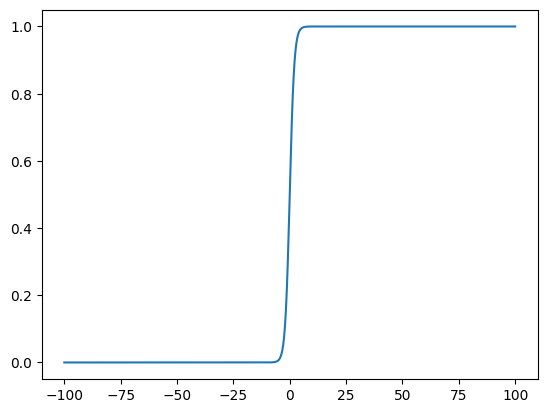

In [24]:
x = np.linspace(-100, 100, 1000)
y = activation(x)
plt.plot(x, activation(x))
plt.show()

# Construction de l'objet neurone 

In [25]:
class Neuron : 
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias 
    
    def excitation(self, inputs):
        return activation(np.dot(self.weights, inputs) + self.bias)
    
    def modif_weight_bias(self, w1, w2, b):
        self.bias = b 
        self.weights = [w1,w2]

# Construction du réseau de neurones 

In [31]:
class ReseauNeuron:
    def __init__(self):
        self.h1 = Neuron([0, 1], 1)
        self.h2 = Neuron([0, 1], 1)
        self.o1 = Neuron([0, 1], 1)

    def prediction(self,x):
        x1 = x[0]
        x2 = x[1]
        out_h1 = self.h1.excitation([x1, x2])
        out_h2 = self.h2.excitation([x1, x2])
        out_o1 = self.o1.excitation([out_h1, out_h2])
        return out_o1
    
    def training(self, data, all_ytrue):
        learn_rate = 0.1
        NbTraining = 1000 

        i = 1 
        for itraining in range(NbTraining):
            for x, y_true in zip(data, all_ytrue):

                #Prediction 
                in_h1 = self.h1.weights[0]*x[0] + self.h1.weights[1]*x[1] + self.h1.bias
                in_h2 = self.h2.weights[0]*x[0] + self.h2.weights[1]*x[1] + self.h2.bias
                out_h1 = self.h1.excitation(x)
                out_h2 = self.h2.excitation(x)
                in_o1 = self.o1.weights[0]*out_h1 + self.o1.weights[1]*out_h2 + self.o1.bias 
                out_o1 = self.o1.excitation(np.array([out_h1, out_h2]))

                y_reseau = out_o1

                dE_dy_reseau = -2*(y_true - y_reseau)

                # Neuron o1
                dy_reseau_dw5 = out_h1 * deriv_activation(in_o1)
                dy_reseau_dw6 = out_h2 * deriv_activation(in_o1)
                dy_reseau_db3 = deriv_activation(in_o1)
          
                dy_reseau_d_h1 =  self.o1.weights[0]* deriv_activation(in_o1)
                dy_reseau_d_h2 =  self.o1.weights[1]* deriv_activation(in_o1)

                # Neuron h1
                dh1_dw1 = x[0] * deriv_activation(in_h1)
                dh1_dw2 = x[1] * deriv_activation(in_h1)
                dh1_db1 = deriv_activation(in_h1)

                # Neuron h2
                dh2_dw3 = x[0] * deriv_activation(in_h2)
                dh2_dw4 = x[1] * deriv_activation(in_h2)
                dh2_db2 = deriv_activation(in_h2)

                new_w1= self.h1.weights[0] - learn_rate * dE_dy_reseau * dy_reseau_d_h1 * dh1_dw1 #w1
                new_w2= self.h1.weights[1] - learn_rate * dE_dy_reseau * dy_reseau_d_h1 * dh1_dw2 #w2
                new_b1= self.h1.bias       - learn_rate * dE_dy_reseau * dy_reseau_d_h1 * dh1_db1 #b1
                self.h1.modif_weight_bias(new_w1,new_w2,new_b1)
                
                # Neuron h2
                new_w3=self.h2.weights[0] - learn_rate * dE_dy_reseau * dy_reseau_d_h2 * dh2_dw3 #w3
                new_w4=self.h2.weights[1] - learn_rate * dE_dy_reseau * dy_reseau_d_h2 * dh2_dw4 #w4
                new_b2=self.h2.bias       - learn_rate * dE_dy_reseau * dy_reseau_d_h2 * dh2_db2 #b2
                self.h2.modif_weight_bias(new_w3,new_w4,new_b2)
        
                # Neuron o1
                new_w5 = self.o1.weights[0] - learn_rate * dE_dy_reseau * dy_reseau_dw5  #w5
                new_w6 = self.o1.weights[1] - learn_rate * dE_dy_reseau * dy_reseau_dw6  #w6
                new_b3 = self.o1.bias       - learn_rate * dE_dy_reseau * dy_reseau_db3  #b3
                self.o1.modif_weight_bias(new_w5,new_w6,new_b3)


                i += 1
            if(itraining+1)%10 == 0:
                y_preds = np.apply_along_axis(self.prediction, 1, data) # prediction pour tous les datas
                Err = error_tot(all_ytrue, y_preds)
                print ("\n training i:",i)
                print ("x1,x2 ytrue,y_pred =",x[0],x[1],y_true,y_reseau)  
                print("Session Training Erreur Totale: %.15f" % (Err))

# Programme Principal


In [35]:
Cerveau = ReseauNeuron()
data = [[60, 165], [73,183],[69,178],[54,152]]
all_ytrue = [0,1,1,0]
Cerveau.training(data, all_ytrue)


 training i: 41
x1,x2 ytrue,y_pred = 54 152 0 0.7343447854299215
Session Training Erreur Totale: 0.297194331408627

 training i: 81
x1,x2 ytrue,y_pred = 54 152 0 0.5822397352858989
Session Training Erreur Totale: 0.253774663144567

 training i: 121
x1,x2 ytrue,y_pred = 54 152 0 0.5340037548466746
Session Training Erreur Totale: 0.250199375642851

 training i: 161
x1,x2 ytrue,y_pred = 54 152 0 0.5225322506532397
Session Training Erreur Totale: 0.250008953982979

 training i: 201
x1,x2 ytrue,y_pred = 54 152 0 0.5198754492629983
Session Training Erreur Totale: 0.250000177581000

 training i: 241
x1,x2 ytrue,y_pred = 54 152 0 0.5192618545662707
Session Training Erreur Totale: 0.250000029594110

 training i: 281
x1,x2 ytrue,y_pred = 54 152 0 0.5191202088828268
Session Training Erreur Totale: 0.250000095483181

 training i: 321
x1,x2 ytrue,y_pred = 54 152 0 0.5190875137554721
Session Training Erreur Totale: 0.250000116021599

 training i: 361
x1,x2 ytrue,y_pred = 54 152 0 0.5190799671222491

In [36]:
Cerveau.prediction([87,190])

np.float64(0.49964989325486353)